## Disease Prediction from Symptoms And Patient Clustering  ML_CP_TY

The dataset : http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html



CONTENTS:
1. The dataset : http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html
2. Raw data transformation,cleaning,pivoting
3. Model on pivoted data
4. Building Classifier: Using Multinomial Naive Bayes
5. Building Classifier: Using Decision Trees
6. Building Classifier: Using Voting Classifier
7. Manual Testing(Single + Multiple symtoms both)
8. Patient Clustering: K Means
9. Elbow Method & Silhouette Scores
10. Patient Clustering: DBSCAN


## Importing all needed libraries

In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Transforming & Loading the Data

### Loading the Dataset File generated 

In [4]:
disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_') # using _ as common splitting delimeter
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group) # refer the data format
        ctr = ctr + 1

    return disease_list

with open("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/raw_data_2.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    
    for row in reader:

        if row[0]!="\xc2\0xa0" and row[0]!="": # for handling file encoding errors
          # saving disease and frequency
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\0xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s) # adding all symptoms
                dict_wt[d] = weight


### Reformatting the data

In [5]:
# saving cleaned data
with open("dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [6]:
columns = ['Source','Target','Weight'] # source: disease, target: symptom, weight: number of cases

In [7]:
data = pd.read_csv("dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [8]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [9]:
data.to_csv("dataset_clean.csv",index=False)

In [10]:
data = pd.read_csv("dataset_clean.csv", encoding ="ISO-8859-1")

In [11]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [12]:
len(data['Source'].unique()) # unique diseases

149

In [13]:
len(data['Target'].unique()) # unique symptoms

405

In [14]:
df = pd.DataFrame(data)

In [15]:
df_1 = pd.get_dummies(df.Target) # 1 hot encoding symptoms

In [16]:
df_1.head()

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [18]:
df_s = df['Source']

In [19]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [20]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [21]:
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,hypertensive disease,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
len(df_pivoted)

2116

In [23]:
cols = df_pivoted.columns

In [24]:
cols = cols[1:] # removing headings

In [25]:
# visualizing existance of symptoms for diseases
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PneumocystisÃÂ cariniiÃÂ pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accidentÃÂ cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquiredÃÂ immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
len(df_pivoted)

149

In [27]:
df_pivoted.to_csv("df_pivoted.csv")

In [28]:
# defining data for training
x = df_pivoted[cols]
y = df_pivoted['Source']

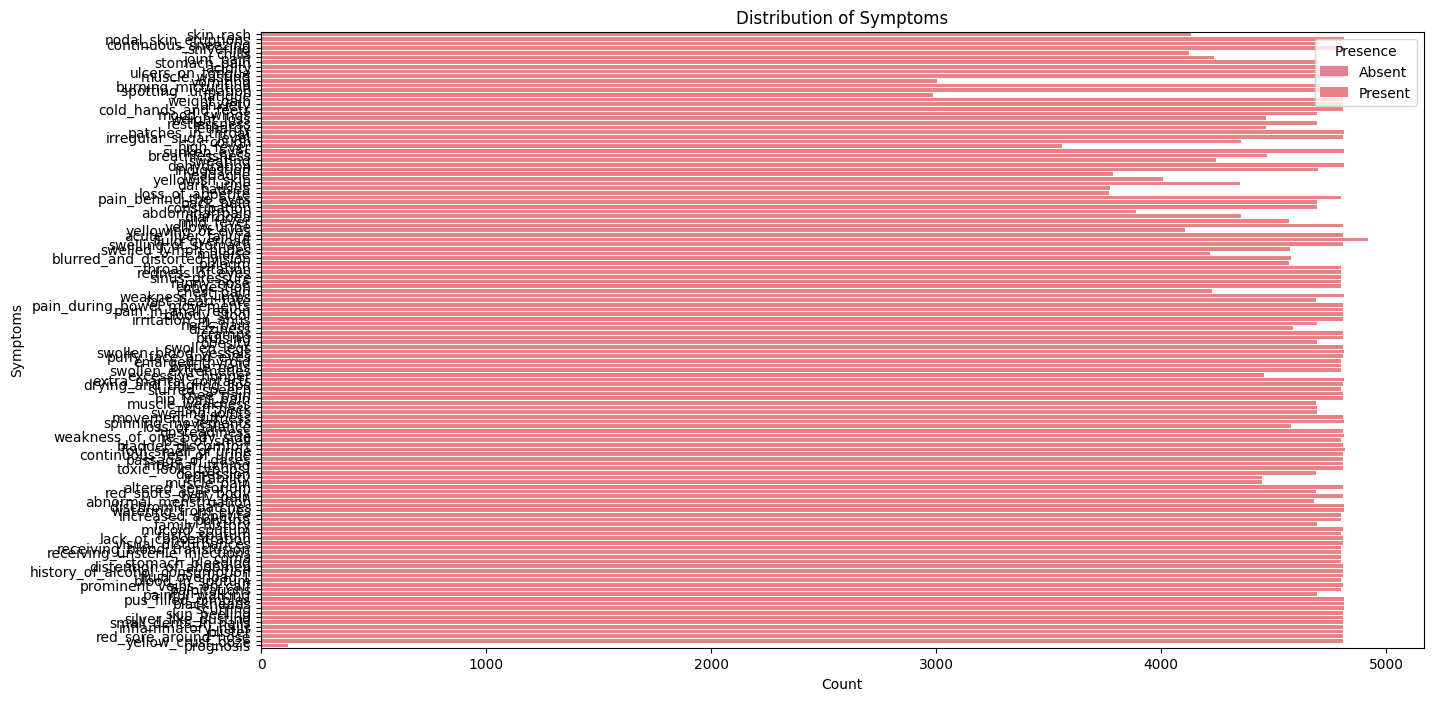

In [29]:
data11 = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")
# print(data11.describe())
plt.figure(figsize=(15, 8))
sns.countplot(data=data11.melt(value_vars=data11.columns[1:]), y='variable', hue='value', dodge=False)
plt.title('Distribution of Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.legend(title='Presence', loc='upper right', labels=['Absent', 'Present'])
plt.show()

##Building Model on pivoted data

In [30]:
# importing all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [31]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
# Training multinomial naive bayes
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [33]:
mnb.score(x_test, y_test)

0.0

In [34]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [35]:
mnb_tot.score(x, y)

0.8993288590604027

In [36]:
disease_pred = mnb_tot.predict(x)

print(disease_pred)

["Alzheimer's disease" 'HIV'
 'PneumocystisÃ\x82Â\xa0cariniiÃ\x82Â\xa0pneumonia'
 'accidentÃ\x82Â\xa0cerebrovascular' 'HIV' 'adenocarcinoma' 'adhesion'
 'affect labile' 'anemia' 'anxiety state' 'aphasia' 'arthritis' 'asthma'
 'bacteremia' 'benign prostatic hypertrophy' 'biliary calculus'
 'bipolar disorder' 'bronchitis' 'candidiasis' 'carcinoma'
 'carcinoma breast' 'carcinoma colon' 'carcinoma of lung'
 'carcinoma prostate' 'cardiomyopathy' 'cellulitis' 'cholecystitis'
 'biliary calculus' 'chronic alcoholic intoxication'
 'chronic kidney failure' 'chronic obstructive airway disease' 'cirrhosis'
 'colitis' 'confusion' 'coronary arteriosclerosis'
 'coronary arteriosclerosis' 'decubitus ulcer' 'deep vein thrombosis'
 'degenerativeÃ\x82Â\xa0polyarthritis' 'deglutition disorder'
 'dehydration' 'delirium' 'delusion' 'dementia' 'dependence'
 'depression mental' 'depression mental' 'diabetes' 'diverticulitis'
 'diverticulosis' 'edema pulmonary' 'effusion pericardial'
 'embolism pulmonary' 'emp

In [37]:
disease_real = y.values
print(disease_real)

["Alzheimer's disease" 'HIV'
 'PneumocystisÃ\x82Â\xa0cariniiÃ\x82Â\xa0pneumonia'
 'accidentÃ\x82Â\xa0cerebrovascular'
 'acquiredÃ\x82Â\xa0immuno-deficiency syndrome' 'adenocarcinoma'
 'adhesion' 'affect labile' 'anemia' 'anxiety state' 'aphasia' 'arthritis'
 'asthma' 'bacteremia' 'benign prostatic hypertrophy' 'biliary calculus'
 'bipolar disorder' 'bronchitis' 'candidiasis' 'carcinoma'
 'carcinoma breast' 'carcinoma colon' 'carcinoma of lung'
 'carcinoma prostate' 'cardiomyopathy' 'cellulitis' 'cholecystitis'
 'cholelithiasis' 'chronic alcoholic intoxication'
 'chronic kidney failure' 'chronic obstructive airway disease' 'cirrhosis'
 'colitis' 'confusion' 'coronary arteriosclerosis'
 'coronary heart disease' 'decubitus ulcer' 'deep vein thrombosis'
 'degenerativeÃ\x82Â\xa0polyarthritis' 'deglutition disorder'
 'dehydration' 'delirium' 'delusion' 'dementia' 'dependence'
 'depression mental' 'depressive disorder' 'diabetes' 'diverticulitis'
 'diverticulosis' 'edema pulmonary' 'effusion 

In [38]:
# printing model error
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: HIV Actual:acquiredÃÂ immuno-deficiency syndrome
Pred: biliary calculus Actual:cholelithiasis
Pred: coronary arteriosclerosis Actual:coronary heart disease
Pred: depression mental Actual:depressive disorder
Pred: HIV Actual:hiv infections
Pred: carcinoma breast Actual:malignant neoplasm of breast
Pred: carcinoma of lung Actual:malignant neoplasm of lung
Pred: carcinoma prostate Actual:malignant neoplasm of prostate
Pred: carcinoma colon Actual:malignant tumor of colon
Pred: candidiasis Actual:oralÃÂ candidiasis
Pred: effusion pericardial Actual:pericardial effusion body substance
Pred: malignant neoplasms Actual:primary malignant neoplasm
Pred: sepsis (invertebrate) Actual:septicemia
Pred: sepsis (invertebrate) Actual:systemic infection
Pred: tonic-clonic epilepsy Actual:tonic-clonic seizures


Using decision trees based on pivoted data

In [39]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [40]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy on pivoted: ", clf_dt.score(x,y))

DecisionTree
Acurracy on pivoted:  0.8993288590604027


In [41]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.jpg', 
                feature_names=cols
               )

In [42]:
from IPython.display import Image
Image(filename='tree.png')

## Manual Analysis data

In [43]:
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")

In [44]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [45]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [46]:
len(data.columns)

133

In [47]:
len(data['prognosis'].unique())

41

In [48]:
df = pd.DataFrame(data)

In [49]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [50]:
len(df)

4920

In [51]:
cols = df.columns

In [52]:
cols = cols[:-1]


In [53]:
len(cols)

132

In [54]:
x = df[cols]
y = df['prognosis']

In [55]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [56]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

## Building Classifier: Using Multinomial Naive Bayes

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [58]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [59]:
mnb.score(x_test, y_test)

1.0

In [60]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1.]
1.0


In [61]:
test_data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Testing.csv")

In [62]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Allergy,NaN
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,GERD,NaN
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chronic cholestasis,NaN
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Drug Reaction,NaN


In [63]:
testx = test_data[cols]
testy = test_data['prognosis']

In [64]:
print("Accuracy Using Multinomial Naive Bayes:")
mnb.score(testx, testy)

Accuracy Using Multinomial Naive Bayes:


0.926829268292683

In [65]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1.]
1.0


In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Create individual classifiers
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = LogisticRegression(random_state=1, max_iter=200)
clf3 = SVC(probability=True, random_state=1)


# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('svc', clf3)], voting='soft')


# Train the voting classifier
voting_clf.fit(X_train, y_train)


# Make predictions
y_pred = voting_clf.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Voting Classifier Accuracy: {accuracy:.2f}")


voting_clf.score(testx, testy)



Voting Classifier Accuracy: 1.00


0.926829268292683

In [67]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create individual classifiers
clf1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=1)
clf2 = lgb.LGBMClassifier(random_state=1)
clf3 = RandomForestClassifier(random_state=1)

# Create a voting classifier using soft voting
voting_clf = VotingClassifier(estimators=[
    ('xgb', clf1),
    ('lgb', clf2),
    ('rf', clf3)],
    voting='soft'  # 'soft' for probabilities, 'hard' for class labels
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy:.2f}")

voting_clf.score(testx,testy)


c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:00:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 262
[LightGBM] [Info] Number of data points in the train set: 3936, number of used features: 131
[LightGBM] [Info] Start training from score -3.652947
[LightGBM] [Info] Start training from score -3.778111
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.724043
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.703209
[LightGBM] [Info] Start training from score -3.812012
[LightGBM] [Info] Start training from score -3.703209
[LightGBM] [Info] Start training from score -3.682800
[LightGBM] [Info] Start training from score -3.623960
[LightGBM] [Info] Start trai

0.926829268292683

## Building Classifier: Using Decision Trees

In [68]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [70]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  0.9772167487684729


In [71]:
from sklearn import model_selection
print ("cross result:")
scores = model_selection.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result:
[0.9501845  0.95933457 0.94454713]
0.9513554007998491


In [72]:
print ("Acurracy on the actual test data: ", clf_dt.score(testx,testy))

Acurracy on the actual test data:  0.926829268292683


In [73]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.dot', 
                feature_names=cols)

In [74]:
!dot -Tpng tree.dot -o tree.png

In [75]:
from IPython.display import Image
Image(filename='tree.png')

In [76]:
dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
        'dehydration', 'indigestion', 'headache', 'yellowish_skin',
        'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the

## Finding Feature Importances

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
print(dt.feature_importances_)

[0.02334168 0.0012238  0.02498471 0.00243271 0.0235661  0.
 0.00395335 0.02193344 0.         0.         0.00154926 0.02188421
 0.         0.00181151 0.00181763 0.         0.         0.
 0.         0.02457854 0.         0.         0.02256045 0.
 0.0012222  0.         0.01780753 0.01163056 0.00189618 0.00213161
 0.         0.         0.         0.02246041 0.02338413 0.02697983
 0.         0.         0.         0.         0.         0.02426241
 0.         0.00061947 0.         0.         0.         0.
 0.02433813 0.         0.         0.         0.02697289 0.
 0.         0.         0.00129107 0.         0.         0.
 0.         0.01952879 0.         0.02422582 0.         0.
 0.         0.         0.         0.         0.         0.
 0.02573662 0.         0.         0.         0.         0.
 0.         0.02689515 0.         0.         0.         0.02379571
 0.00123592 0.         0.02473336 0.00152805 0.         0.0012133
 0.         0.0233691  0.         0.02691854 0.0012309  0.02442975
 

In [78]:
indices = np.argsort(importances)[::-1]
print([data.columns[i] for i in indices])

['loss_of_appetite', 'redness_of_eyes', 'internal_itching', 'hip_joint_pain', 'polyuria', 'inflammatory_nails', 'brittle_nails', 'blood_in_sputum', 'yellow_crust_ooze', 'nodal_skin_eruptions', 'unsteadiness', 'abnormal_menstruation', 'weight_loss', 'prominent_veins_on_calf', 'fluid_overload.1', 'depression', 'lack_of_concentration', 'malaise', 'muscle_pain', 'mild_fever', 'neck_pain', 'altered_sensorium', 'palpitations', 'movement_stiffness', 'shivering', 'belly_pain', 'nausea', 'continuous_feel_of_urine', 'itching', 'rusty_sputum', 'receiving_blood_transfusion', 'patches_in_throat', 'dark_urine', 'family_history', 'stomach_pain', 'vomiting', 'coma', 'pus_filled_pimples', 'bloody_stool', 'sunken_eyes', 'breathlessness', 'joint_pain', 'dischromic _patches', 'continuous_sneezing', 'scurring', 'dehydration', 'sweating', 'fatigue', 'spotting_ urination', 'muscle_wasting', 'red_spots_over_body', 'weakness_of_one_body_side', 'chest_pain', 'spinning_movements', 'toxic_look_(typhos)', 'skin_ra

In [79]:
features = cols

In [80]:
for f in range(20):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 35 - loss_of_appetite (0.026980)
2. feature 52 - redness_of_eyes (0.026973)
3. feature 93 - internal_itching (0.026919)
4. feature 79 - hip_joint_pain (0.026895)
5. feature 105 - polyuria (0.026657)
6. feature 128 - inflammatory_nails (0.025972)
7. feature 72 - brittle_nails (0.025737)
8. feature 118 - blood_in_sputum (0.025126)
9. feature 131 - yellow_crust_ooze (0.025049)
10. feature 2 - nodal_skin_eruptions (0.024985)
11. feature 86 - unsteadiness (0.024733)
12. feature 101 - abnormal_menstruation (0.024652)
13. feature 19 - weight_loss (0.024579)
14. feature 119 - prominent_veins_on_calf (0.024460)
15. feature 117 - fluid_overload.1 (0.024457)
16. feature 95 - depression (0.024430)
17. feature 109 - lack_of_concentration (0.024375)
18. feature 48 - malaise (0.024338)
19. feature 97 - muscle_pain (0.024292)
20. feature 41 - mild_fever (0.024262)


In [81]:
export_graphviz(dt, 
                out_file='tree-top5.dot', 
                feature_names=cols,
                max_depth = 5
               )

In [82]:
!dot -Tpng tree-top5.dot -o tree-top5.png

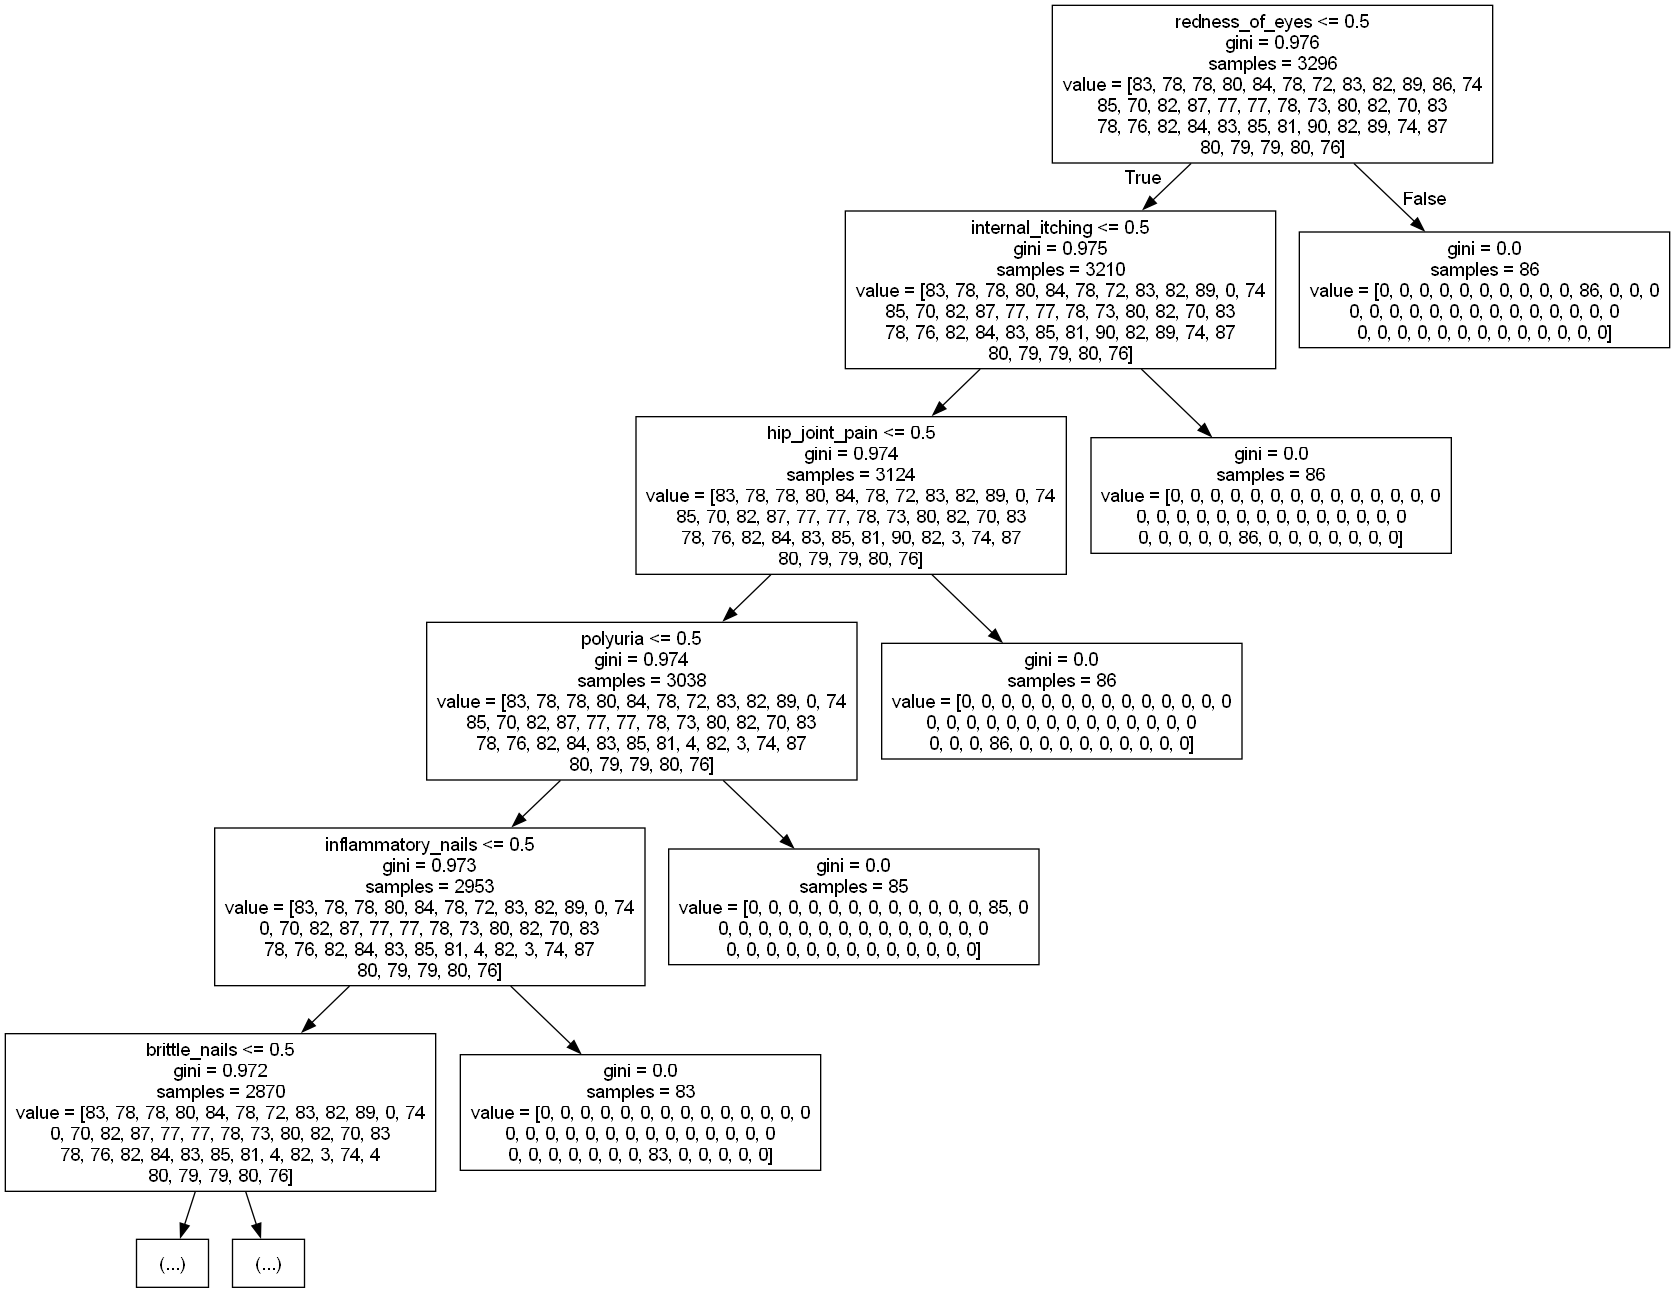

In [83]:
from IPython.display import Image
Image(filename='tree-top5.png')

In [84]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [85]:
print(feature_dict)
feature_dict['runny_nose']

{'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and

54

In [86]:
sample_x = [i/52 if i==52 else i*0 for i in range(len(features))]
cols = list(data.columns) 
print(cols.index('runny_nose'))

54


This means predicting the disease where the only symptom is redness_of_eyes.

In [87]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))
print(sample_x)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [88]:
print(dt.predict(sample_x))

['Common Cold']


c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [89]:
dt.predict_proba(sample_x)

c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [90]:
len(sample_x)

1

## Manual TEST MULTIPLE SYMPTOMS

In [92]:
symptoms = ['skin_rash','itching','nodal_skin_eruptions','increased_appetite','irritability']
ipt = [0 for i in range(len(features))]
for s in symptoms:
  ipt[cols.index(s)]=1
ipt = np.array([ipt])
print(ipt)
print(dt.predict(ipt))
dt.predict_proba(ipt)

[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['Fungal infection']


c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\bhave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)


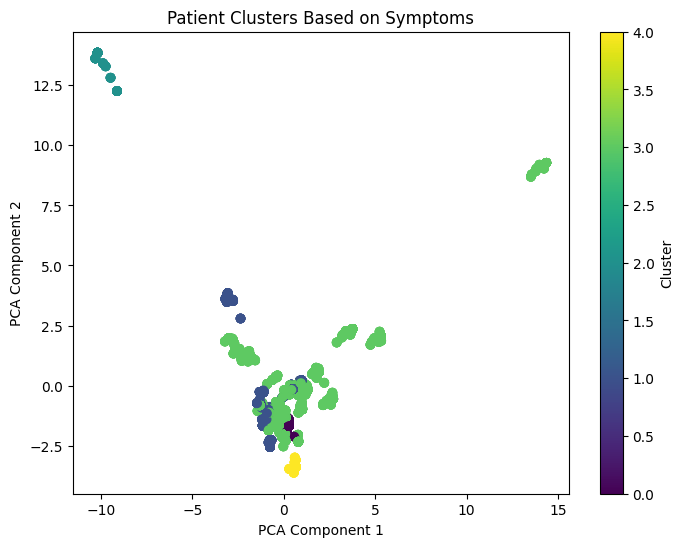

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv')

#drop  column named prognosis
df = df.drop('prognosis', axis=1)


#print column names
cols = df.columns
print(cols)
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust n_clusters based on your dataset
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Patient Clusters Based on Symptoms')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


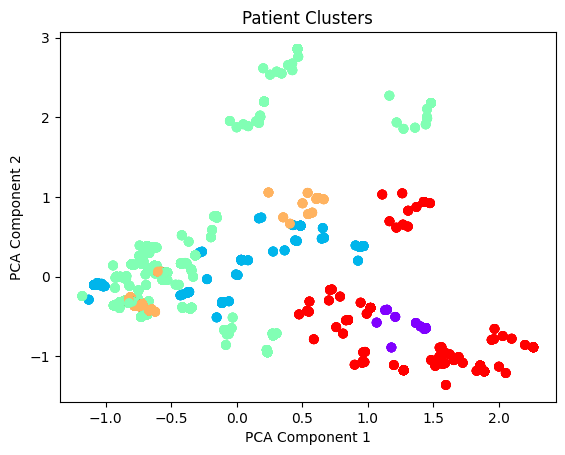

In [94]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")

# Drop the label column if included (like 'prognosis')
X = data.drop('prognosis', axis=1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # choose number of clusters (k)
kmeans.fit(X)

# Add the cluster labels to the data
data['Cluster'] = kmeans.labels_

# Visualize the clustering (2D projection using PCA)
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='rainbow')
plt.title('Patient Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [95]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale the features for DBSCAN
X_scaled = StandardScaler().fit_transform(X)

# Fit DBSCAN (adjust eps and min_samples accordingly)
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

print(data['Cluster_DBSCAN'].value_counts())


Cluster_DBSCAN
216    90
268    90
261    84
291    84
274    78
       ..
138     6
139     6
140     6
141     6
303     6
Name: count, Length: 304, dtype: int64


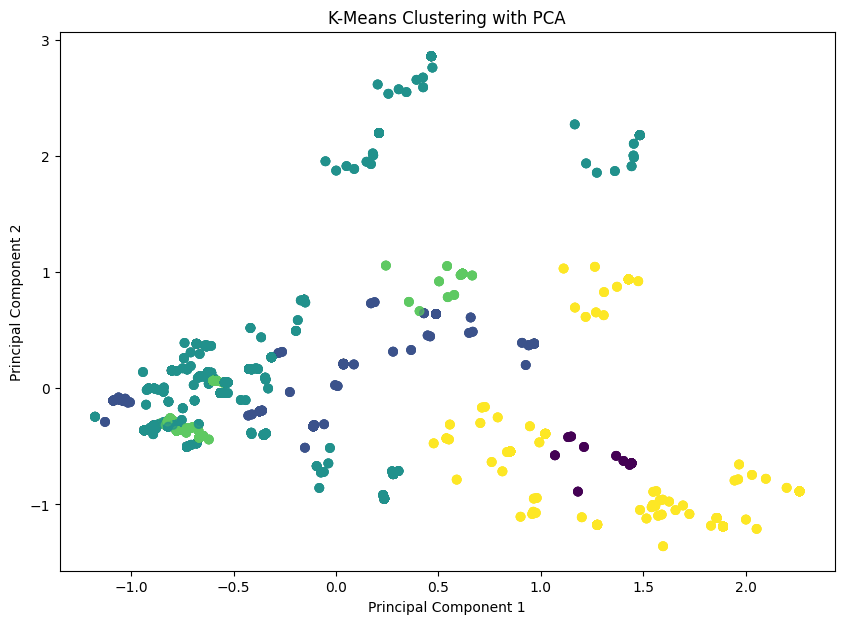

In [96]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Now use X_pca for visualization instead of X
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


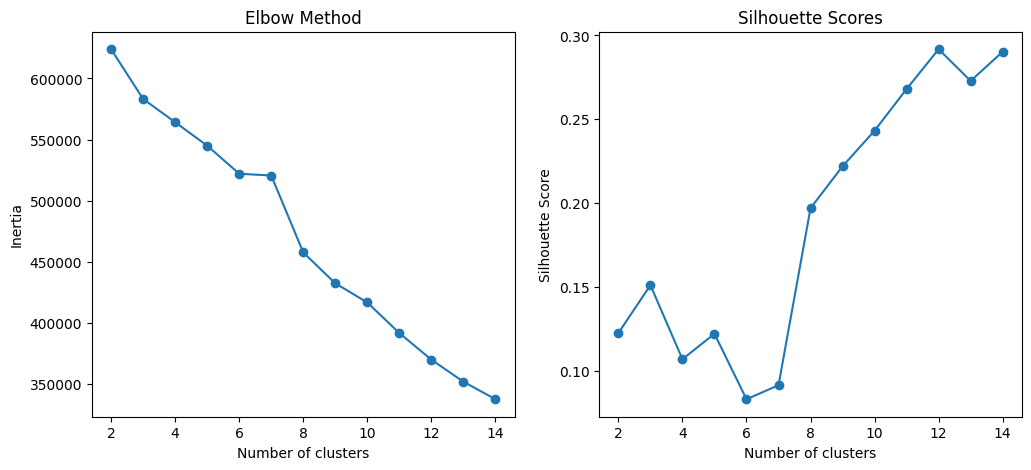

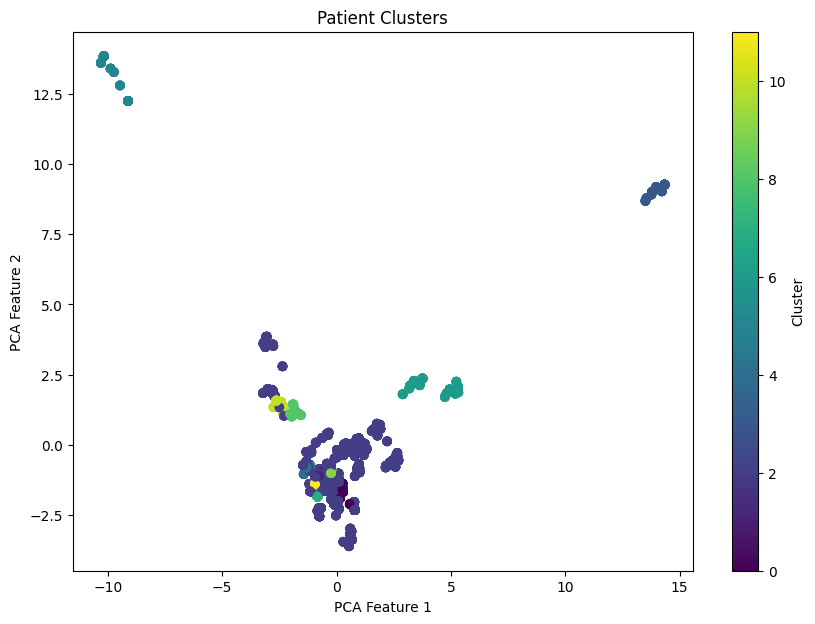

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")

# Drop the label column if included (like 'prognosis')
X = data.drop('prognosis', axis=1)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot the Elbow method and Silhouette score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 15), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

# Fit the KMeans model with the optimal number of clusters
optimal_k = np.argmax(silhouette_scores) + 2  # Adjust for range starting at 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Save the clustered data to CSV
data.to_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Clustered_data.csv", index=False)

# Visualize clusters (2D projection using PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Patient Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


"itching",
"skin_rash",
"nodal_skin_eruptions",
"continuous_sneezing",
"shivering",
"chills",
"joint_pain",
"stomach_pain",
"acidity",
"ulcers_on_tongue",
"muscle_wasting",
"vomiting",
"burning_micturition",
"spotting_ urination",
"fatigue",
"weight_gain",
"anxiety",
"cold_hands_and_feets",
"mood_swings",
"weight_loss",
"restlessness",
"lethargy",
"patches_in_throat",
"irregular_sugar_level",
"cough",
"high_fever",
"sunken_eyes",
"breathlessness",
"sweating",
"dehydration",
"indigestion",
"headache",
"yellowish_skin",
"dark_urine",
"nausea",
"loss_of_appetite",
"pain_behind_the_eyes",
"back_pain",
"constipation",
"abdominal_pain",
"diarrhoea",
"mild_fever",
"yellow_urine",
"yellowing_of_eyes",
"acute_liver_failure",
"fluid_overload",
"swelling_of_stomach",
"swelled_lymph_nodes",
"malaise",
"blurred_and_distorted_vision",
"phlegm",
"throat_irritation",
"redness_of_eyes",
"sinus_pressure",
"runny_nose",
"congestion",
"chest_pain",
"weakness_in_limbs",
"fast_heart_rate",
"pain_during_bowe

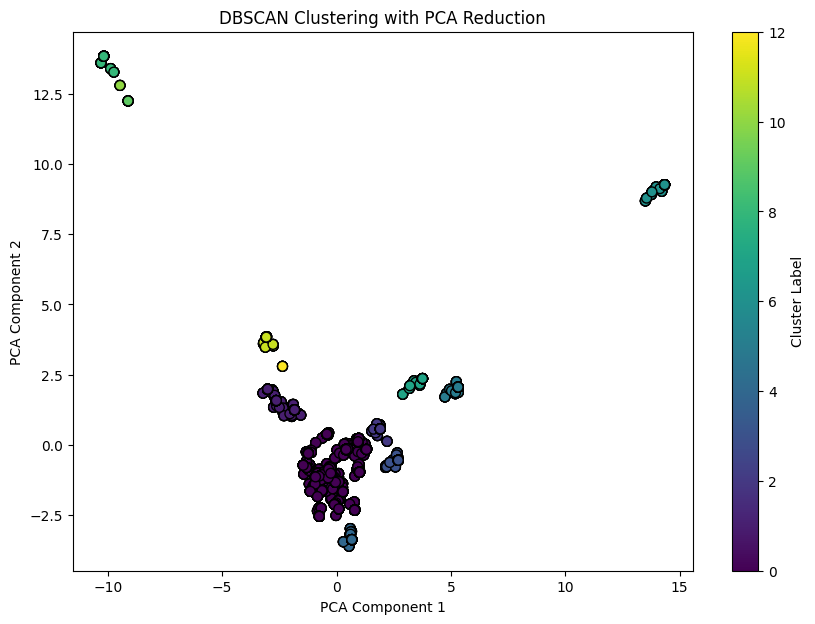

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/Training.csv")
for i in range(len(data.columns)):
    print('"'+data.columns[i]+'"'+',')

# Drop the label column if included (like 'prognosis')
X = data.drop('prognosis', axis=1)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples as needed
clusters = dbscan.fit_predict(pca_result)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Save the clustered data to a new CSV file
data.to_csv("D:/TY_ML_CP/Disease-Prediction-from-Symptoms-main/Datasets/DBSCAN_Clustered_data_with_PCA.csv", index=False)

# Visualize the clusters (2D projection)
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clustering with PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
